In [ ]:
import pandas as pd
import sys
sys.path.append('../')
from modules.plots import tradeoff_performance_fairness
pd.set_option('display.max_columns', 100)

In [ ]:
path = "./results"
folders = [
    ('SM_1H_K2',11,"CSNN"),
    ('MM_1H_K2',15,"CSNN"),
    ('LM_1H_K2',23,"CSNN"),
    ('SM_2H_K3',16,"CSNN"),
    ('MM_2H_K2',9,"CSNN"),
    ('LM_2H_K3',23,"CSNN"),
    ('SM_3H_K2',21,"CSNN"),
    ('MM_3H_K2',22,"CSNN"),
    ('LM_3H_K2',10,"CSNN"),

    ("FFSNN_1H",22,"FFSNN"),
    ("FFSNN_2H",25,"FFSNN"),
    ("FFSNN_3H",21,"FFSNN"),

    ("CNN_1H",1,"CNN"),
    ("CNN_2H",1,"CNN"),
    ("CNN_3H",1,"CNN"),

    ("FFNN_1H",1,"FFNN"),
    ("FFNN_2H",1,"FFNN"),
    ("FFNN_3H",1,"FFNN"),
]

dfs = []
for f, steps, type in folders:
    results_df = pd.read_csv(f'{path}/{f}.csv')
    model = f.split('-')[0]
    results_df['model'] = model
    results_df['steps'] = steps
    results_df['type'] = type
    dfs.append(results_df)
    print(f'Loaded {f} – {len(results_df)} results')
len(dfs)

Loaded SM_1H_K2 – 600 results
Loaded MM_1H_K2 – 600 results
Loaded LM_1H_K2 – 600 results
Loaded SM_2H_K3 – 600 results
Loaded MM_2H_K2 – 600 results
Loaded LM_2H_K3 – 600 results
Loaded SM_3H_K2 – 600 results
Loaded MM_3H_K2 – 600 results
Loaded LM_3H_K2 – 600 results
Loaded FFSNN_1H – 600 results
Loaded FFSNN_2H – 600 results
Loaded FFSNN_3H – 600 results
Loaded CNN_1H – 600 results
Loaded CNN_2H – 600 results
Loaded CNN_3H – 600 results
Loaded FFNN_1H – 600 results
Loaded FFNN_2H – 600 results
Loaded FFNN_3H – 600 results


18

In [ ]:
results_df = pd.concat(dfs)
results_df = results_df[['type', 'dataset','recall@5FPR', 'fpr_ratio_age', 'fpr_ratio_income', 'fpr_ratio_employment']]
results_df = results_df[results_df['fpr_ratio_age'] > 0]
results_df = results_df[results_df['fpr_ratio_income'] > 0]
results_df = results_df[results_df['fpr_ratio_employment'] > 0]
results_df = results_df[results_df['recall@5FPR'] > 0]
results_df = results_df.rename(columns={'type': 'model'})
results_df

,model,dataset,recall@5FPR,fpr_ratio_age,fpr_ratio_income,fpr_ratio_employment
0,CSNN,Base,0.287352,0.941583,0.949325,0.994285
6,CSNN,Base,0.282140,0.915579,0.979398,0.966276
7,CSNN,Variant I,0.394024,0.932979,0.990594,0.939018
14,CSNN,Variant II,0.364837,0.988380,0.982697,0.999142
17,CSNN,Variant V,0.401207,0.960843,0.960697,0.986239
...,...,...,...,...,...,...
475,FFNN,Variant I,0.084086,0.954199,0.980689,0.943510
498,FFNN,Base,0.151494,0.993911,0.978027,0.925767
506,FFNN,Variant II,0.000347,0.851834,0.891328,0.837862
511,FFNN,Variant I,0.211258,0.932290,0.992346,0.960868


In [4]:
mean = results_df.groupby(['model']).aggregate({
    'recall@5FPR': ['mean', 'std'],
    'fpr_ratio_age': ['mean', 'std'],
    'fpr_ratio_income': ['mean', 'std'],
    'fpr_ratio_employment': ['mean', 'std'],
}).reset_index()
mean

model recall@5FPR           fpr_ratio_age           fpr_ratio_income  \
                mean       std          mean       std             mean   
0    CNN    0.261791  0.124652      0.946343  0.128915         0.956956   
1   CSNN    0.361784  0.083436      0.977541  0.022684         0.977455   
2   FFNN    0.078387  0.061703      0.918519  0.133807         0.924113   
3  FFSNN    0.118127  0.048801      0.970012  0.032326         0.969911   

            fpr_ratio_employment            
        std                 mean       std  
0  0.078725             0.923381  0.144436  
1  0.025115             0.964517  0.035995  
2  0.133803             0.906103  0.140173  
3  0.037216             0.952538  0.053463

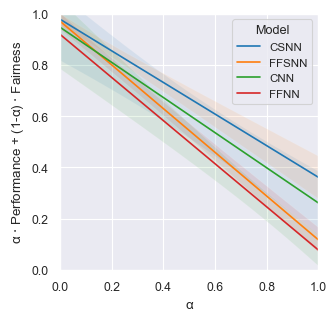

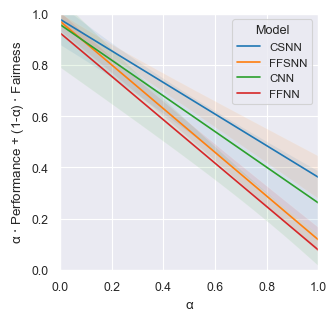

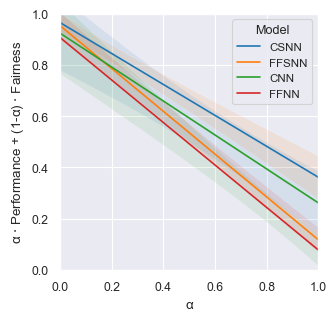

In [ ]:
for attr in ['age', 'income', 'employment']:
    tradeoff_performance_fairness(results_df, 'recall@5FPR', f'fpr_ratio_{attr}', 
        y_label='\u03B1 $\cdot$ Performance + (1-\u03B1) $\cdot$ Fairness', 
        text_scale=1,
        loc='best',
    )